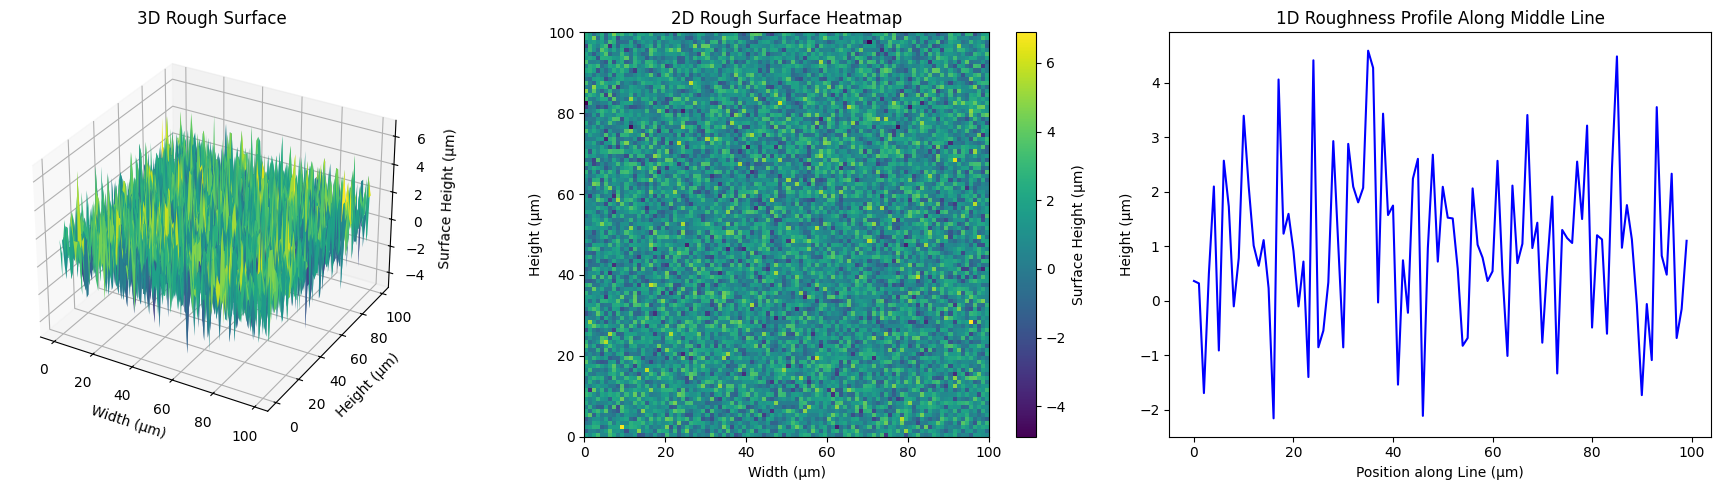

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define surface parameters
width, height = 100, 100  # size of the 2D surface grid in µm
Ra = 1.0  # Average roughness in µm
Rq = 1.5  # Root mean square roughness in µm

# Generate a rough surface using Gaussian random heights
np.random.seed(42)  # for reproducibility
surface_height = np.random.normal(loc=Ra, scale=Rq, size=(width, height))

# Generate X and Y grid for the 3D surface plot
X, Y = np.meshgrid(np.arange(width), np.arange(height))

# Set up figure with three subplots
fig = plt.figure(figsize=(18, 5))

# Plotting the 3D rough surface
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, surface_height, cmap='viridis', edgecolor='none')
ax1.set_title("3D Rough Surface")
ax1.set_xlabel("Width (µm)")
ax1.set_ylabel("Height (µm)")
ax1.set_zlabel("Surface Height (µm)")

# Plotting the 2D heatmap of the rough surface
ax2 = fig.add_subplot(132)
heatmap = ax2.imshow(surface_height, cmap='viridis', origin='lower', extent=[0, width, 0, height])
fig.colorbar(heatmap, ax=ax2, label="Surface Height (µm)")
ax2.set_title("2D Rough Surface Heatmap")
ax2.set_xlabel("Width (µm)")
ax2.set_ylabel("Height (µm)")

# Plotting the 1D profile along the middle line
line_position = width // 2
profile_line = surface_height[line_position, :]  # 1D profile along the middle row

ax3 = fig.add_subplot(133)
ax3.plot(np.arange(height), profile_line, color='b')
ax3.set_title("1D Roughness Profile Along Middle Line")
ax3.set_xlabel("Position along Line (µm)")
ax3.set_ylabel("Height (µm)")

plt.tight_layout()
plt.show()


In [2]:
!pip install tetgen trimesh meshio


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\AP07080\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import tetgen
from stl import mesh

# Define surface parameters in nanometers
width, height = 100, 100  # 2D surface grid dimensions
Ra_nm = 1.0e3  # Average roughness in nm
Rq_nm = 1.5e3  # RMS roughness in nm

# Generate rough surface in nanometers
np.random.seed(42)
surface_height_nm = np.random.normal(loc=Ra_nm, scale=Rq_nm, size=(width, height))

# Generate vertices and faces for the mesh
X, Y = np.meshgrid(np.arange(width), np.arange(height))
vertices = np.zeros((width * height, 3))
vertices[:, 0] = X.ravel() * 1e3  # X in nm
vertices[:, 1] = Y.ravel() * 1e3  # Y in nm
vertices[:, 2] = surface_height_nm.ravel()  # Z in nm

faces = []
for i in range(width - 1):
    for j in range(height - 1):
        idx = i * height + j
        # Define two triangles for each square in the grid
        faces.append([idx, idx + 1, idx + height])
        faces.append([idx + 1, idx + height + 1, idx + height])

# Convert to numpy arrays for STL and TetGen compatibility
vertices = np.array(vertices)
faces = np.array(faces)

# Create and save the STL file
surface_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface_mesh.vectors[i][j] = vertices[f[j], :]

# Save STL file
surface_mesh.save('rough_surface_nanometers.stl')
print("STL file saved as 'rough_surface_nanometers.stl'")

# Convert to TetGen format
tgen = tetgen.TetGen(vertices, faces)
tetrahedral_mesh = tgen.tetrahedralize(order=1)

# Export to .mesh format compatible with TetGen
tetrahedral_mesh.write("rough_surface_nanometers.mesh")
print("TetGen mesh file saved as 'rough_surface_nanometers.mesh'")


STL file saved as 'rough_surface_nanometers.stl'


RuntimeError: Failed to tetrahedralize.
May need to repair surface by making it manifold